****Visualizing Arterial Roads using OpenStreet Map****

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.1
    Uninstalling networkx-3.4.1:
      Successfully uninstalled networkx-3.4.1
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 63 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


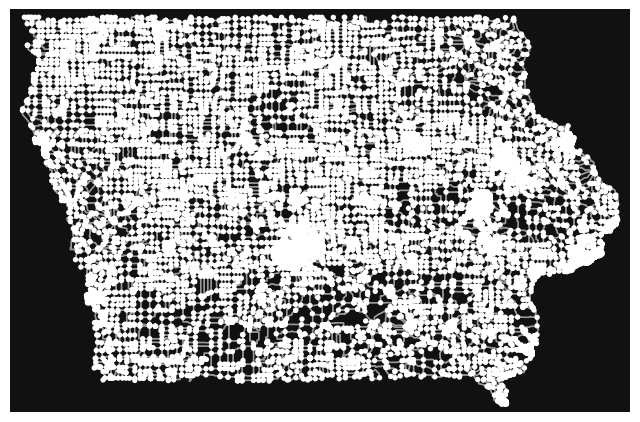

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
# Use OpenStreetMap to Identify Multilane Arterial Roads in Iowa
!pip install osmnx
import osmnx as ox

# Define the region (Iowa)
place = "Iowa, USA"

# Retrieve the road network
# Filter for highway types that correspond to arterial roads (adjust filters based on OSM classification)
roads = ox.graph_from_place(place, network_type='drive', custom_filter='["highway"~"primary|secondary|tertiary"]')

# Plot the arterial roads
ox.plot_graph(roads)

<Axes: >

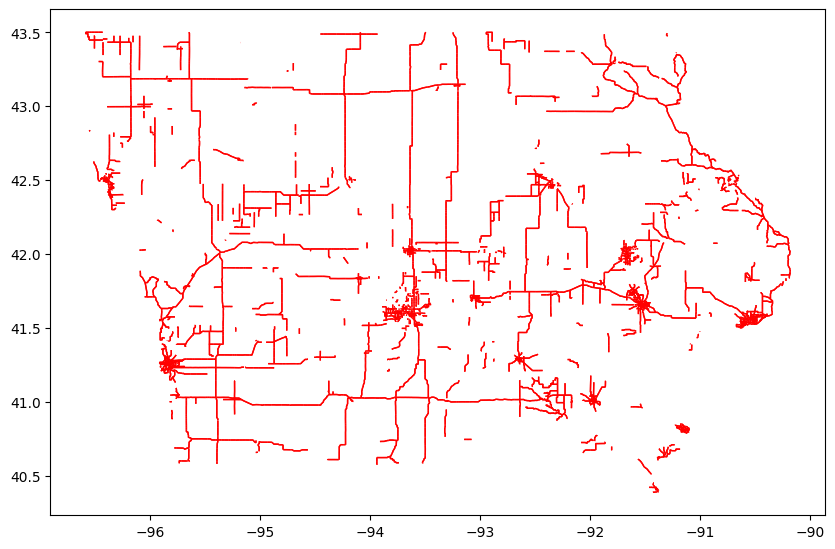

In [ ]:
# Convert the graph to a GeoDataFrame
import pandas as pd

gdf_nodes, gdf_edges = ox.graph_to_gdfs(roads)

# Modify the filtering to handle list values in 'lanes' column
# If 'lanes' is a list, take the maximum value; otherwise, use the value as is.
# Then, convert to numeric, fill NaNs with 0, and finally cast to integers.
gdf_edges['lanes_numeric'] = gdf_edges['lanes'].apply(lambda x: max(x) if isinstance(x, list) else x)
multilane_roads = gdf_edges[pd.to_numeric(gdf_edges['lanes_numeric'], errors='coerce').fillna(0).astype(int) > 1]

# Plot the multilane roads
multilane_roads.plot(figsize=(10, 10), linewidth=1, edgecolor='r')

****Data Extraction and Cleaning****

In [ ]:
# Mount files from Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check the Directory in Colab
import os

# List the files in the directory (adjust the path to your folder)
path = '/content/drive/MyDrive/Mini Project Datasets/Accidents1'  # or '/content/path_to_your_folder' for local
files = os.listdir(path)
print(files)

['accident2019.CSV', 'accident2018.csv', 'accident2020.csv', 'accident2021.csv', 'accident2022.csv', 'merged_accidents1_iowa.csv']


In [ ]:
# Read and Merge accident CSV Files
import pandas as pd
import os

In [ ]:
# Path to the folder containing accident datasets
path = '/content/drive/MyDrive/Mini Project Datasets/Accidents1'

In [ ]:
# Initialize an empty list to store DataFrames
dfs = []

# Loop through all CSV files in the directory
for file in os.listdir(path):
    if file.endswith('.csv'):
        # Read each CSV file
        df = pd.read_csv(os.path.join(path, file), encoding='latin-1')

        # Filter by State number for Iowa (State = 19)
        df_iowa = df[df['STATE'] == 19]

        # Append the filtered DataFrame to the list
        dfs.append(df_iowa)

In [ ]:
# Concatenate all the DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the merged DataFrame
print(merged_df.head())

   STATE STATENAME  ST_CASE  VE_TOTAL  VE_FORMS  PVH_INVL  PEDS  PERSONS  \
0     19      Iowa   190001         1         1         0     0        1   
1     19      Iowa   190002         1         1         0     0        1   
2     19      Iowa   190003         1         1         0     0        1   
3     19      Iowa   190004         1         1         0     0        5   
4     19      Iowa   190005         1         1         0     0        1   

   PERMVIT  PERNOTMVIT  ...  HOSP_MN                        HOSP_MNNAME  CF1  \
0        1           0  ...       88   Not Applicable (Not Transported)  0.0   
1        1           0  ...       88   Not Applicable (Not Transported)  0.0   
2        1           0  ...       88   Not Applicable (Not Transported)  0.0   
3        5           0  ...       99  Unknown EMS Hospital Arrival Time  0.0   
4        1           0  ...       88   Not Applicable (Not Transported)  0.0   

  CF1NAME  CF2  CF2NAME  CF3 CF3NAME  FATALS  DRUNK_DR  
0    

In [ ]:
# Save the Merged DataFrame
merged_df.to_csv('/content/drive/MyDrive/Mini Project Datasets/Accidents1/merged_accidents1_iowa.csv', index=False)

In [ ]:
# Viewing dataset with PySpark
#Importing function
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#Creating the Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MySparkApp").getOrCreate()

In [ ]:
#Loading file using PySpark
df1 = spark.read.csv('/content/drive/MyDrive/Mini Project Datasets/Accidents1/merged_accidents1_iowa.csv', header=True, inferSchema=True)
df1.show()

+-----+---------+-------+--------+--------+--------+----+-------+-------+----------+------+----------------+----+--------------+---+-------+-----+---------+----+--------+------------+----+---------------+------+----------+---+--------------------+-----+--------------------+--------------------+---------------+-------+-----------+--------+--------------------+--------+--------------------+------+------------+-----------+------------+------------+------------+------+--------------------+-------+--------------------+--------+--------------------+-------+-----------+-------+--------------------+-------+--------------------+--------+--------------------+--------+------------------+--------+-------------------+--------+-------------------+--------+--------------------+-------+-------------------+-------+-----------+-------+--------------+--------+---------------+-------+-------------------+--------+--------------------+-------+--------------------+-------+--------------------+-------+-------

In [ ]:
# Extract Crash Data from FARS Database, Focusing on Fatalities on Arterial roads
import pandas as pd

# Load FARS crash data (adjust the file path)
fars_data = pd.read_csv('/content/drive/MyDrive/Mini Project Datasets/Accidents1/merged_accidents1_iowa.csv')

# Filter for fatalities
# Use isin() to check if 'PEDS' is in the desired range
fatals = fars_data[(fars_data['FATALS'] > 0) & fars_data['FUNC_SYS'].isin([2,3,4])]

# Display filtered data
fatals.head()

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
3,19,Iowa,190004,1,1,0,0,5,5,0,...,99,Unknown EMS Hospital Arrival Time,0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
5,19,Iowa,190006,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
9,19,Iowa,190010,2,2,0,0,3,3,0,...,5,5,0.0,NaN,0.0,NaN,0.0,NaN,1,0.0
10,19,Iowa,190011,2,2,0,0,6,6,0,...,99,Unknown EMS Hospital Arrival Time,20.0,Police Pursuit Involved,0.0,NaN,0.0,NaN,3,0.0
13,19,Iowa,190014,2,2,0,0,2,2,0,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0.0


In [ ]:
print(fatals.shape)

(1755, 91)


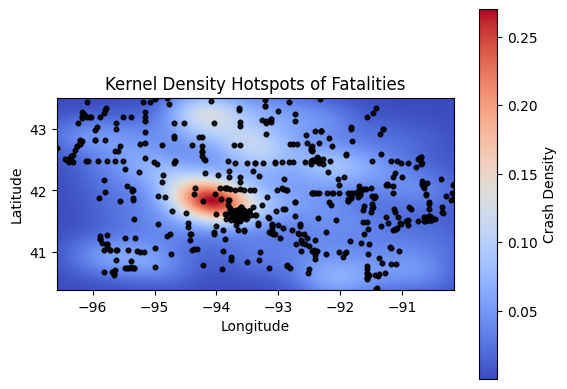

In [ ]:
# Apply Spatial Analysis Techniques (Kernel Density Estimation, Getis-Ord Gi) to Identify Hotspots*
!pip install geopandas scipy matplotlib
import geopandas as gpd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(fatals, geometry=gpd.points_from_xy(fatals.LONGITUD, fatals.LATITUDE))

# Kernel Density Estimation (KDE)
coords = gdf[['LONGITUD', 'LATITUDE']].values.T
kde = gaussian_kde(coords)

# Evaluate KDE on a grid
# Create a grid of points covering the area of interest
x_min, x_max = gdf.LONGITUD.min(), gdf.LONGITUD.max()
y_min, y_max = gdf.LATITUDE.min(), gdf.LATITUDE.max()
x_grid, y_grid = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
density = kde(positions)

# Reshape density to match grid shape
density = density.reshape(x_grid.shape)

# Plot the density
plt.imshow(density, cmap='coolwarm', extent=[x_min, x_max, y_min, y_max], origin='lower')
plt.colorbar(label='Crash Density')
plt.scatter(gdf.LONGITUD, gdf.LATITUDE, s=10, color='black', alpha=0.5)  # Plot crash points
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kernel Density Hotspots of Fatalities')
plt.show()

# Add density to the GeoDataFrame
gdf['density'] = kde(coords)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 38.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 172 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/esda/getisord.py:178: RuntimeWarning: overflow encountered in scalar multiply
  EG2DEN = ((sum(y) ** 2 - sum(y2)) ** 2) * n * (n - 1) * (n - 2) * (n - 3)
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  self.bins = quantile(y, k=k)


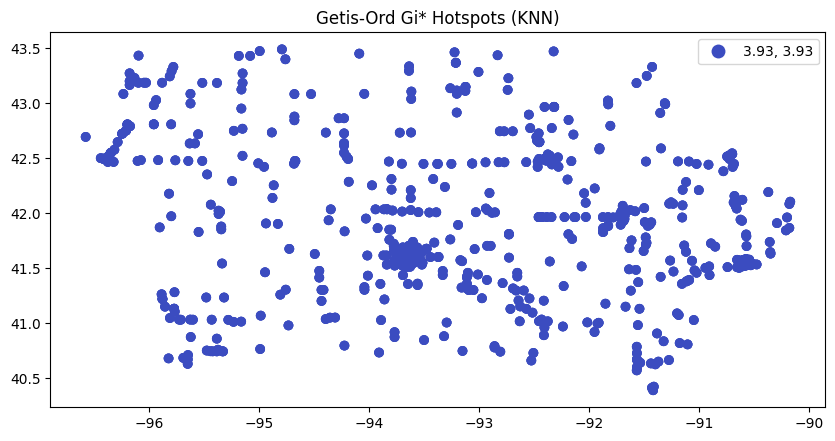

In [ ]:
# Apply Spatial Analysis Techniques (Getis-Ord Gi) to Identify Hotspots*
!pip install esda
!pip install mapclassify>=2.4.0 # Install the required package with version using pip

import geopandas as gpd
from esda.getisord import G
import libpysal as lp
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your data loaded into a GeoDataFrame called 'gdf'
# with columns for 'latitude' and 'longitude' representing crash locations

# 1. Create KNN weights matrix
coords = gdf[['LONGITUD', 'LATITUDE']].values  # Extract coordinates
knn = NearestNeighbors(n_neighbors=4)  # Specify the number of neighbors (k)
knn.fit(coords)
distances, indices = knn.kneighbors(coords)
w = lp.weights.KNN.from_dataframe(gdf, k=4) # Create KNN weights matrix using libpysal

# 2. Calculate Getis-Ord Gi* statistic
g_star = G(gdf['FUNC_SYS'], w)
gdf['g_star'] = g_star.z_sim  # Store standardized Gi* values in the GeoDataFrame

# 3. Visualize hotspots
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='g_star', cmap='coolwarm', scheme='quantiles', legend=True, ax=ax) # This line caused the error
ax.set_title('Getis-Ord Gi* Hotspots (KNN)')
plt.show()

In [ ]:
# Analyze the Characteristics of These Hotspots
# Analyze fatalitites by day of the week, road type
hotspot_analysis = fatals.groupby(['FUNC_SYS', 'DAY_WEEK']).agg({'FATALS':'sum'}).reset_index()
print(hotspot_analysis)

    FUNC_SYS  DAY_WEEK  FATALS
0          2         1       3
1          3         1     135
2          3         2     255
3          3         3     198
4          3         4     126
5          3         5     210
6          3         6     156
7          3         7     198
8          4         1     105
9          4         2      63
10         4         3      78
11         4         4      93
12         4         5      87
13         4         6     147
14         4         7      93


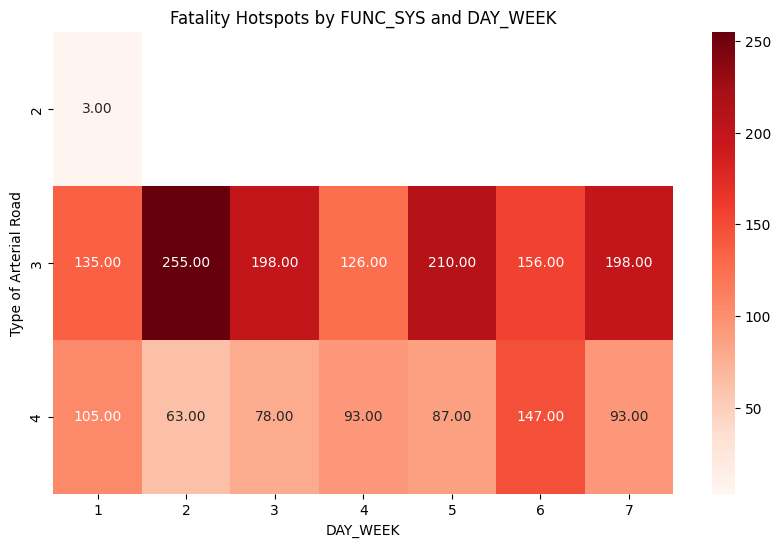

In [ ]:
# Visualizing fatality hotspots on arterial roads using day of the week
import seaborn as sns
import matplotlib.pyplot as plt

hotspot_analysis = fatals.groupby(['FUNC_SYS', 'DAY_WEEK']).agg({'FATALS':'sum'}).reset_index()

# Pivot the data for heatmap
hotspot_analysis_pivot = hotspot_analysis.pivot(index="FUNC_SYS", columns="DAY_WEEK", values="FATALS")

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
# Use 'g' or '.2f' for general or fixed-point float formatting
sns.heatmap(hotspot_analysis_pivot, annot=True, cmap="Reds", fmt=".2f")
plt.title("Fatality Hotspots by FUNC_SYS and DAY_WEEK")
plt.xlabel("DAY_WEEK")
plt.ylabel("Type of Arterial Road")
plt.show()

****Other visualizations for fatality hotspots****

In [ ]:
!pip install plotly # Install Plotly if you haven't already

import plotly.express as px
import pandas as pd

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming 'fatals' is your DataFrame

# Group by 'FUNC_SYS' and 'HOUR', and sum 'FATALS'
hotspot_analysis = fatals.groupby(['FUNC_SYS', 'HOUR']).agg({'FATALS': 'sum'}).reset_index()

# --- Filter data to limit HOUR to 24 ---
hotspot_analysis = hotspot_analysis[hotspot_analysis['HOUR'] <= 23]

# --- End of filtering ---

# Create the interactive scatter plot
fig = px.scatter(hotspot_analysis,
                 x='HOUR',
                 y='FATALS',
                 color='FUNC_SYS',
                 size='FATALS',
                 hover_data=['FUNC_SYS', 'HOUR', 'FATALS'],  # Add hover data
                 title='Interactive Scatter Plot of Fatalities by Hour and Functional System (HOUR limited to 24)')

fig.update_traces(marker=dict(sizemode='area', sizeref=2.*max(hotspot_analysis['FATALS'])/(40.**2),
                              sizemin=4))  # Adjust marker size

fig.show()

****Analyzing fatalities by Arterial type and drunk drivers****

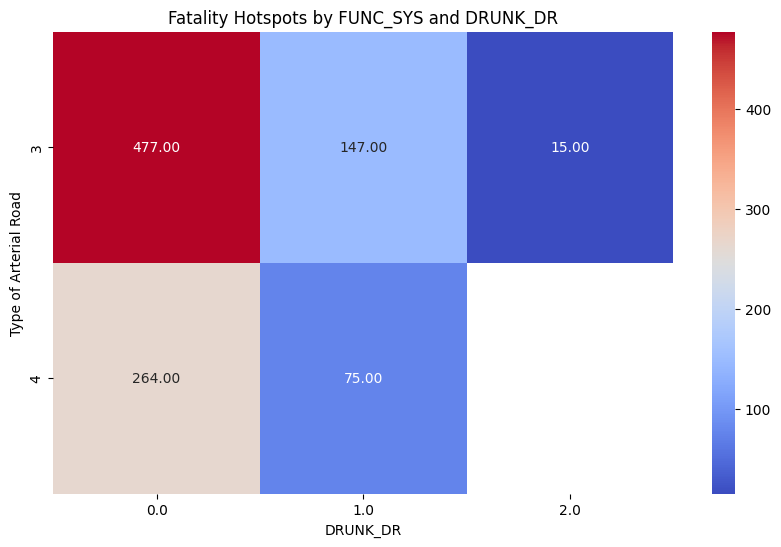

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

hotspot_analysis = fatals.groupby(['FUNC_SYS', 'DRUNK_DR']).agg({'FATALS':'sum'}).reset_index()

# Pivot the data for heatmap
hotspot_analysis_pivot = hotspot_analysis.pivot(index="FUNC_SYS", columns="DRUNK_DR", values="FATALS")

# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
# Use 'g' or '.2f' for general or fixed-point float formatting
sns.heatmap(hotspot_analysis_pivot, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Fatality Hotspots by FUNC_SYS and DRUNK_DR")
plt.xlabel("DRUNK_DR")
plt.ylabel("Type of Arterial Road")
plt.show()

****Analyzing fatalities by Arterial type and land use****

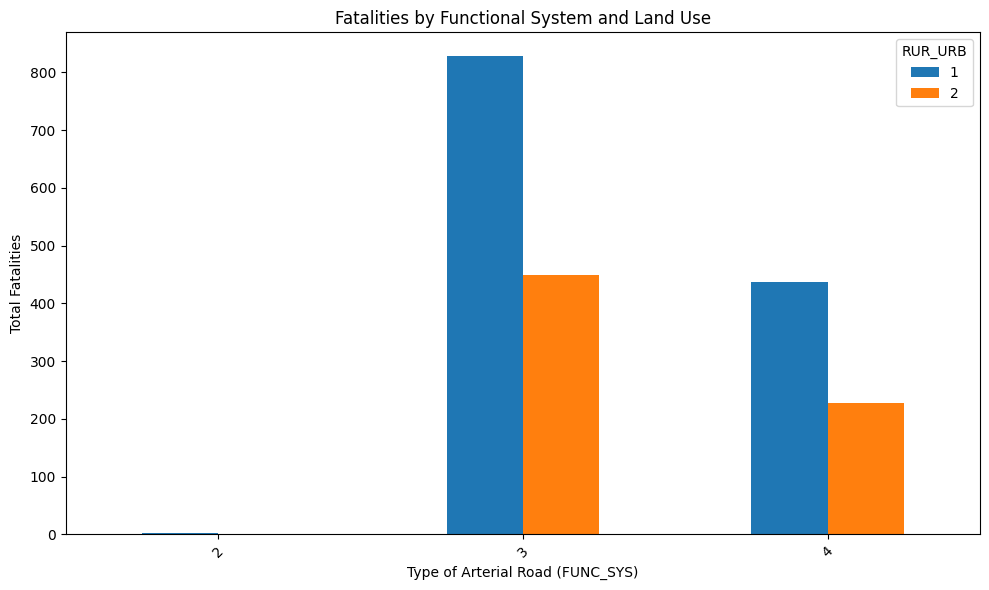

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data for bar plot, aggregating 'FATALS' using sum for duplicate index/column combinations
hotspot_analysis_pivot = fatals.pivot_table(
    index="FUNC_SYS",
    columns="RUR_URB",
    values="FATALS",
    aggfunc='sum'  # or another appropriate aggregation function like 'mean', 'count' etc.
).fillna(0)

# Create a grouped bar plot
hotspot_analysis_pivot.plot(kind='bar', figsize=(10, 6))
plt.title("Fatalities by Functional System and Land Use")
plt.xlabel("Type of Arterial Road (FUNC_SYS)")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45)
plt.legend(title="RUR_URB")
plt.tight_layout()
plt.show()

****Developing a predictive model for fatalities on Arterial Roads****

In [ ]:
# Check the actual column names in your DataFrame:
print(fatals.columns)

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [ ]:
# For fatals dataframe
!pip install matplotlib seaborn plotly folium xgboost scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from IPython.display import HTML
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# 1. Data Preprocessing:
# Select relevant features and target variable
# Corrected feature names to match the actual columns in 'fatals' DataFrame
features = ['FUNC_SYS', 'RUR_URB', 'DRUNK_DR', 'HOUR', 'WEATHER',
            'PEDS', 'PERSONS', 'NHS', 'ROUTE']
target = 'FATALS'  # FATALS represents the number of fatalities

X = fatals[features]
y = fatals[target]

# One-hot encode categorical features
categorical_features = ['FUNC_SYS', 'RUR_URB', 'WEATHER']  # Add other categorical features
# The handle_unknown='ignore' parameter was causing rows with unseen categories in the test data to be dropped.
# handle_unknown='ignore' is useful for data that may contain unseen categories, but using it can potentially lead to incorrect or incomplete encoding of those unseen categories.
encoder = OneHotEncoder(sparse_output=False, handle_unknown='error')  # Changed handle_unknown='ignore' to handle_unknown='error' for now to ensure proper dataset shape alignment
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features), index=X.index)  # Added index=X.index to align indices


# Drop original categorical features and add encoded features
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Training:
# Initialize and train the XGBoost model
# --- Apply Label Encoding to the target variable ---
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Use transform, not fit_transform, for y_test
# --- End of Label Encoding ---

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# 4. Model Evaluation:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9857549857549858
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       317
           1       0.96      0.86      0.91        28
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1

    accuracy                           0.99       351
   macro avg       0.99      0.97      0.98       351
weighted avg       0.99      0.99      0.99       351



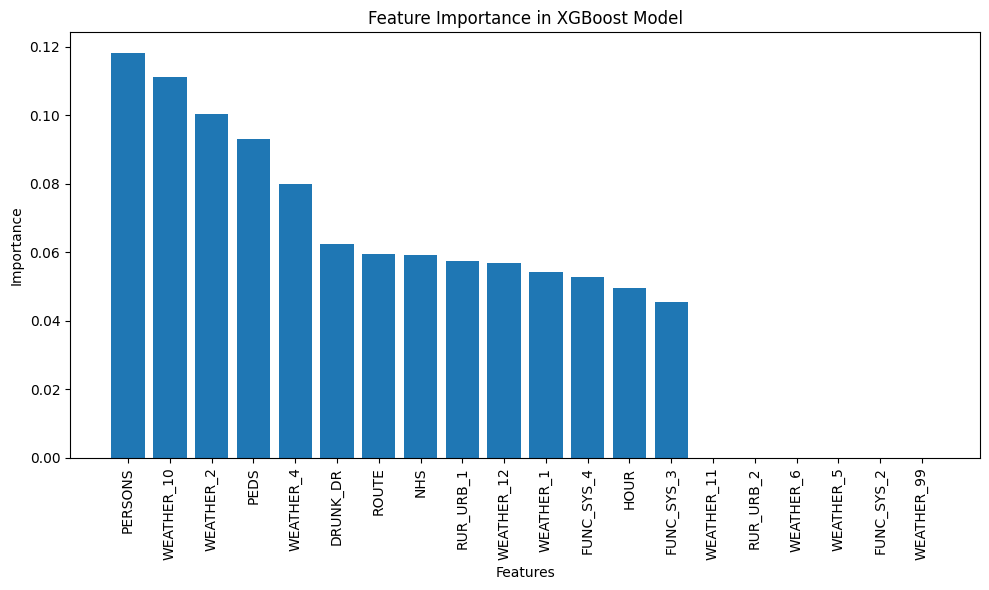

In [ ]:
# Checking for most influencial varaibles in my predictive model
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train has feature names
    'Importance': importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in XGBoost Model')
plt.tight_layout()
plt.show()

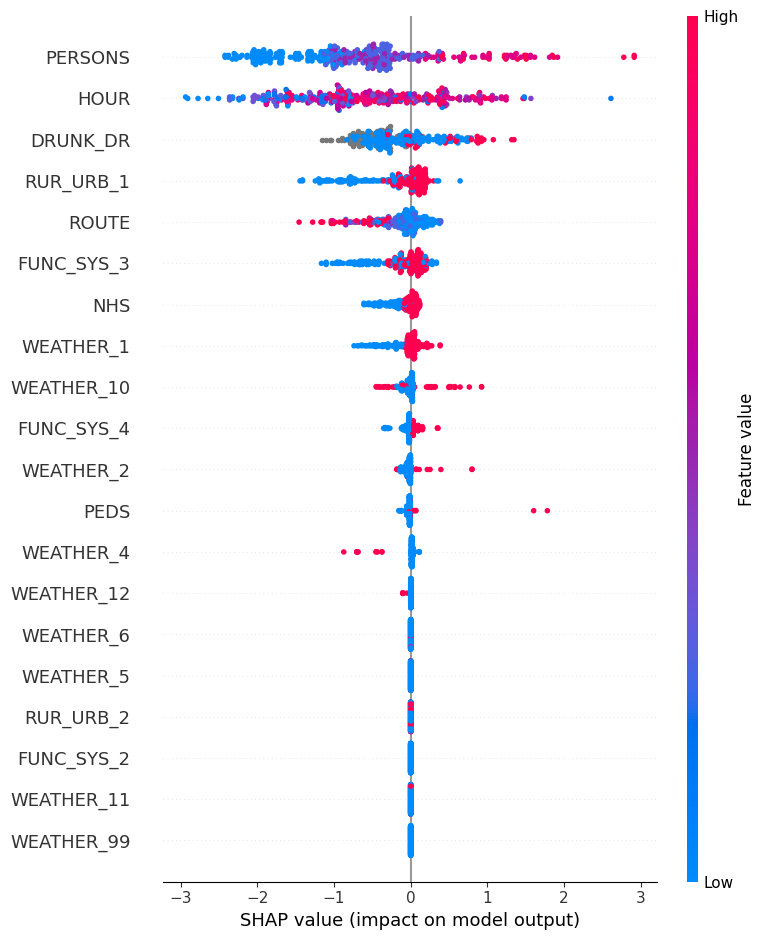

In [ ]:
#SHAP (SHapley Additive exPlanations) Values

!pip install shap
import shap

# Initialize SHAP explainer with the correct model (XGBoost in this case)
explainer = shap.TreeExplainer(model)  # Changed rf to model

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Assuming a multi-class classification problem, select a class to visualize
class_index = 1  # For example, visualize the second class

# Visualize the most important features globally for the selected class
# The issue is you are trying to index a 3D array with a single index.
# For multi-class classification, shap_values is a 3D array: (num_samples, num_features, num_classes)
# You need to index it with the class_index as well to get the SHAP values for a specific class
shap.summary_plot(shap_values[:, :, class_index], X_test)  # Corrected indexing

# If you want to visualize the SHAP values for all classes, use:
#shap.summary_plot(shap_values, X_test)

****Creating Visualizations and Time-Lapse Animations of Crash Patterns****

In [ ]:
!pip install matplotlib pandas
import pandas as pd

# Load your crash dataset
df5 = pd.read_csv('/content/drive/MyDrive/Mini Project Datasets/Accidents1/merged_accidents1_iowa.csv')

# Ensure 'timestamp' is in datetime format
time_column_name = 'YEAR'  # Replace with the actual column name

# Ensure 'timestamp' is in datetime format
df5['timestamp'] = pd.to_datetime(df5[time_column_name])

# Sort data by time
df5 = df5.sort_values('timestamp')

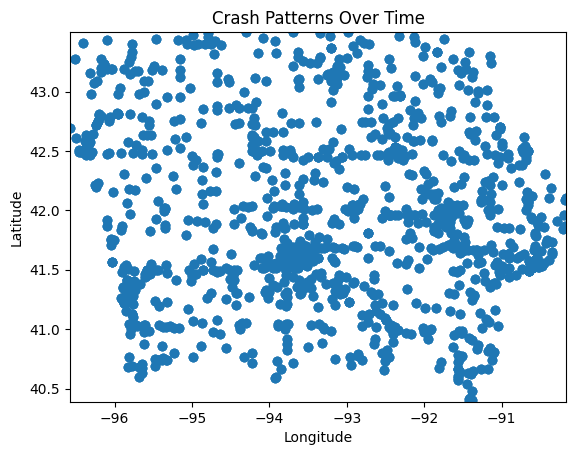

In [ ]:
# Set up matplotlib for Animation: You will use matplotlib.animation.FuncAnimation to create the time-lapse effect.
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Set limits for the map (adjust as per your data's latitude and longitude)
ax.set_xlim([min(df5['LONGITUD']), max(df5['LONGITUD'])])
ax.set_ylim([min(df5['LATITUDE']), max(df5['LATITUDE'])])

# Initialize an empty scatter plot
scat = ax.scatter([], [], animated=True)

# Set title and labels
ax.set_title('Crash Patterns Over Time')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Function to initialize the plot
def init():
    # Initialize with an empty 2D array
    scat.set_offsets(np.empty((0, 2)))
    return scat,

# Function to update the plot for each frame (time slice)
def update(frame):
    # Select data up to the current time slice
    current_data = df5[df5['timestamp'] <= frame] # Use df5 instead of df

    # Update scatter plot with current data's latitude and longitude
    scat.set_offsets(current_data[['LONGITUD', 'LATITUDE']].values) # Use .values to get numpy array

    return scat,

# Generate the animation (this updates for every unique timestamp)
timestamps = df5['timestamp'].unique()
ani = FuncAnimation(fig, update, frames=timestamps, init_func=init, blit=True, repeat=False, interval=200) # Added interval

# Display the animation in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
# Save the Animation as a Video or GIF: You can save the animation to a video or GIF file.
# Save the animation as an MP4 video
ani.save('timestamp.mp4', writer='ffmpeg')

****Propose Data-Driven Recommendations for Improving Pedestrian Safety****
#Increase or improve weather responsive ttraffic signals
#Improve road infrastructure such as safer pedestrian crossings, better lighting, etc.
#Increase law enformcement for high fatality hours like increased police patrols or speed reduction.
#More invstigation should be conducted to understand high fatality rates on FUNCT_SYS 3 and 4 roads to inform safety interventions.









